In [27]:
# TASK 2.1 -- DECISION TREE
 # 1. Construct a decision tree for diabetes dataset given in Assessment-1 using Information gain.
 # 2. Train the model and display the classification tree. Explain the decision tree in text cell.
 # 3. Evaluate the model using the test dataset.
 # 4. Print the accuracy of the model and confusion matrix for the model built.
 # 5. Predict the person is diabetic or not for the new input feature: 
 #     “Male, 80, 0, 0, never, 22.06, 9, 155”

Number of missing values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Accuracy: 97.16%
Precision: 1.00

Confusion Matrix:
 [[17534     0]
 [  546  1150]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17534
           1       1.00      0.68      0.81      1696

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230

Predicted Class for New Data:
Diabetic


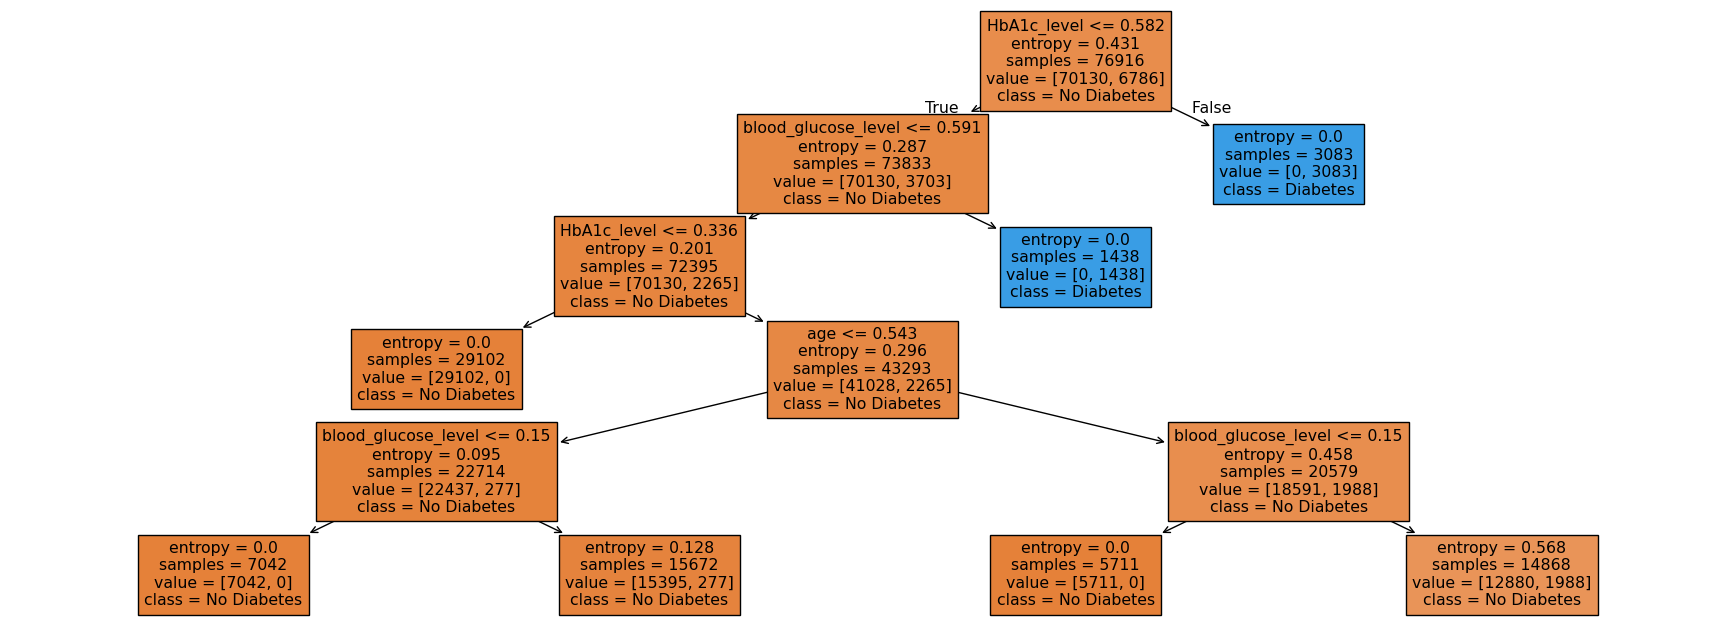

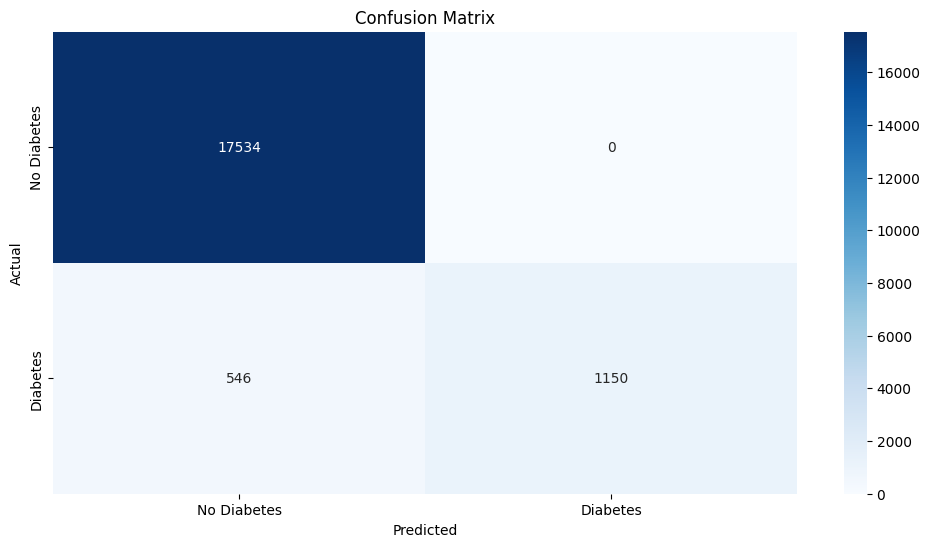

In [28]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv('Datasets\diabetes_prediction_dataset.csv')

# PRE-PROCESSING

#Removing duplicate entries
df.drop_duplicates(inplace=True)

#Check for missing values
print("Number of missing values:")
print(df.isnull().sum())

# Handle missing values(if any):
# Using mode for categorical and mean for numerical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())


# Encode categorical variables
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])  # Female=0, Male=1
df['smoking_history'] = encoder.fit_transform(df['smoking_history'])  # Encodes smoking history

# Feature Scaling (normalize numerical columns)
scaler = MinMaxScaler()
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

# Train the model and display the classification tree. Explain the decision tree in text cell.

# Define features and target variable
X = df.drop(columns=['diabetes'])  # Features
y = df['diabetes']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree Model with Class Weights and Pruning
clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# 3. Evaluating the model
y_pred = clf.predict(X_test)


# Print the accuracy of the model and confusion matrix for the model built.

# Displaying Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Predict the person is diabetic or not for the new input feature
# “Male, 80, 0, 0, never, 22.06, 9, 155”

# Validating with new input data
new_data = pd.DataFrame([[1, 80, 0, 0, 2, 22.06, 9, 155]], columns=X.columns)

# Applying the same feature scaling
new_data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.transform(new_data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

# Making prediction
prediction = clf.predict(new_data)

print("Predicted Class for New Data:")
if prediction[0] == 1:
    print("Diabetic")
else:
    print("Non-Diabetic")


# Visualize Decision Tree
plt.figure(figsize=(22, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.show()
print("\n")


# Visualize Confusion Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [29]:
# # TASK 2.2 --  SVM
# Implement the SVM algorithm on the diabetes dataset with 42 samples given below. 1. Convert
# the target class into binary class which has two class labels namely ‘0’ and ‘1’. Transform the
# value ‘0.5’ to ‘0’. 2. Draw the graph with linearly separable line that separates the two distinct
# classes. 3. Predict the target class value for “HbA1c=5 and blood_glucose_level-100”. 4. Justify
# the statement. Model yields 100% accuracy but it fails to predict the target class for new dataset.

Training Accuracy: 93.94%
Test Accuracy: 100.00%
SVM Prediction for HbA1c=5 and blood_glucose_level=100: Non-Diabetic


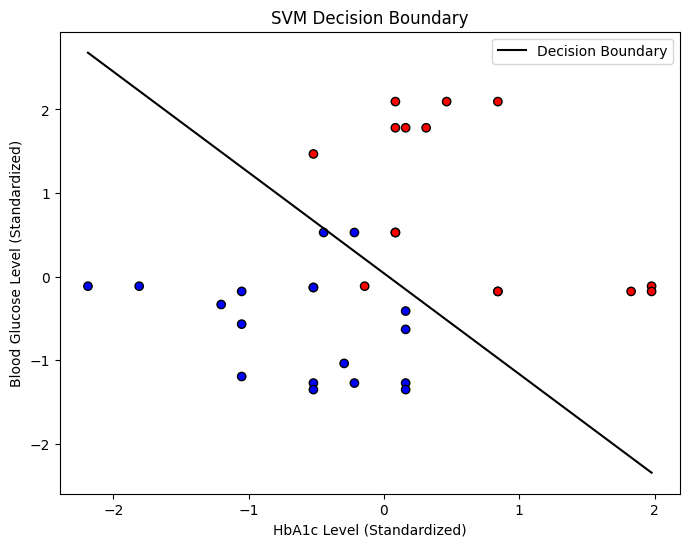

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load the Dataset
data = pd.read_csv("Datasets\svm_diabetes_data.csv")

# Step 2: Convert Target Class into Binary (0.5 -> 0)
data['diabetes'] = data['diabetes'].replace(0.5, 0)

# Step 3: Define Features and Target Variable
X = data[['HbA1c_level', 'blood_glucose_level']].values
y = data['diabetes'].values  # Target class (0 or 1)

# Step 4: Normalize Feature Values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Use this for training

# Step 5: Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train SVM Model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Step 7: Predict on Training and Test Sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Step 8: Calculate Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 9: Predict Target Class for Given Values (HbA1c=5, blood_glucose_level=100)
input_data = np.array([[5, 100]])  # Given input
input_scaled = scaler.transform(input_data)  # Scale input
predicted_class = clf.predict(input_scaled)  # Predict

print("SVM Prediction for HbA1c=5 and blood_glucose_level=100:", "Diabetic" if predicted_class[0] == 1 else "Non-Diabetic")


# Step 10: Plot Decision Boundary
def plot_svm_boundary(X, y, model):
    plt.figure(figsize=(8, 6))

    # Scatter plot of data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

    # Get the hyperplane
    w = model.coef_[0]  # SVM weight vector
    b = model.intercept_[0]  # SVM bias term
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    
    # Compute decision boundary line
    x_values = np.linspace(x_min, x_max, 100)
    y_values = -(w[0] / w[1]) * x_values - (b / w[1])  # y = mx + c

    # Plot the decision boundary
    plt.plot(x_values, y_values, 'k-', label="Decision Boundary")

    # Labels and title
    plt.xlabel('HbA1c Level (Standardized)')
    plt.ylabel('Blood Glucose Level (Standardized)')
    plt.title("SVM Decision Boundary")
    plt.legend()
    plt.show()

# Call function to plot decision boundary
plot_svm_boundary(X_train, y_train, clf)


# CONCLUSION: Since the test accuracy is 100%, the model is likely overfitting, meaning it has
#  memorized the training data and so fails to generalize to new inputs, leading to incorrect predictions.
#  Thus it justifies the statement- “Model yields 100% accuracy but it fails to predict the target class
#  for new dataset.”

In [31]:
# TASK 2.3 -- KNN
# 1. Consider the preprocessed data from Task 2.2.
# 2. Apply kNN to predict whether a person is diabetic/non-diabetic for the following input fea
#    tures for “HbA1c=5 and blood_glucose_level-100”.
#  3. k value is considered as 7.
#  4. Use the Euclidean distance to find the neighbourhood points

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Preprocessed Dataset (from Task 2.2)
data = pd.read_csv("Datasets\svm_diabetes_data.csv")

#PRE-PROCESSING
# Convert Target Class into Binary (0.5 -> 0)
data['diabetes'] = data['diabetes'].replace(0.5, 0)

# Define Features and Target Variable
X = data[['HbA1c_level', 'blood_glucose_level']].values
y = data['diabetes'].values  # Target class (0 or 1)

# Normalize Feature Values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train kNN Model with k=7 and Euclidean Distance
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)

# Predict on Test Set and Calculate Accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"kNN Model Accuracy: {accuracy * 100:.2f}%")

# Predict for Given Input (HbA1c=5 and blood_glucose_level=100)
input_data = np.array([[5, 100]])  # Given input
input_scaled = scaler.transform(input_data)  # Scale input
predicted_class = knn.predict(input_scaled)  # Predict

print("kNN Prediction for HbA1c=5 and blood_glucose_level=100:", "Diabetic" if predicted_class[0] == 1 else "Non-Diabetic")

# Find 7 Nearest Neighbors
distances, indices = knn.kneighbors(input_scaled)

# Print Nearest Neighbors in Table Format
neighbors_df = pd.DataFrame({
    "Neighbor": np.arange(1, 8),
    "Index": indices[0],
    "Distance": distances[0],
    "Class": y_train[indices[0]]
})

print("\nEuclidean Distances of the 7 Nearest Neighbors:")
print(neighbors_df.to_string(index=False))  # Table format


kNN Model Accuracy: 100.00%
kNN Prediction for HbA1c=5 and blood_glucose_level=100: Non-Diabetic

Euclidean Distances of the 7 Nearest Neighbors:
 Neighbor  Index  Distance  Class
        1     28  0.156525    0.0
        2     13  0.469575    0.0
        3      0  0.579678    0.0
        4      3  0.615550    0.0
        5     29  0.720456    0.0
        6     25  0.757145    0.0
        7     21  0.860887    0.0


In [33]:
# Task 2.4 
# 1. Consider the models implemented in Task 2.2(M1) and Task 2.3(M2).
# 2. Also apply linear regression model (M3) for the dataset given in Task 2.2.
# 3. Apply ensemble approach on these three models and compare the results from all the three models (M1,M2,M3) with ensemble technique.  

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 

# Data from Task 2.2
df = pd.read_csv('Datasets\svm_diabetes_data.csv')

# Preprocessing
df['diabetes'] = df['diabetes'].replace(0.5, 0)

# Prepare features and target
X = df[['HbA1c_level', 'blood_glucose_level']].values # Convert to numpy array
y = df['diabetes'].values # Convert to numpy array


# Spliting data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Model Performance Comparison:")

# Model 1: SVM (M1)
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy (M1): {svm_accuracy*100:.2f}%")

# Model 2: kNN (M2)
knn_clf = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"kNN Accuracy (M2): {knn_accuracy*100:.2f}%")


# Model M3: Linear Regression (Used for Classification)
lin_reg = LogisticRegression() 
lin_reg.fit(X_train, y_train)
y_pred_linreg = lin_reg.predict(X_test)
linreg_accuracy = accuracy_score(y_test, y_pred_linreg)
print(f"Linear Regression Accuracy: {linreg_accuracy*100:.2f}%")


# Ensemble: Voting Classifier
ensemble_clf = VotingClassifier(estimators=[('svm', svm_clf), ('knn', knn_clf)], voting='hard')
ensemble_clf.fit(X_train, y_train)
ensemble_pred = ensemble_clf.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred) 
print(f"Ensemble Accuracy: {ensemble_accuracy*100:.2f}%")


Model Performance Comparison:
SVM Accuracy (M1): 92.31%
kNN Accuracy (M2): 76.92%
Linear Regression Accuracy: 92.31%
Ensemble Accuracy: 76.92%
